In [4]:
# import the necessary libraries and packages 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

import seaborn as sn

In [5]:
#check the given data

df = pd.read_csv('kc_house_data.csv')
df.head(10)

df.date = pd.to_datetime(df.date)
print('Number of records: '+str(len(df)))
display(df.head())
display(df.info())

Number of records: 21597


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

None

In [6]:
# top 75%

price75= df['price'].quantile(0.75)
type(price75)

float

In [7]:
# make a dataframe with the quantile

expensive = df[(df['price'] >= price75)]
# expensive_df = df[(df['price'] >= price75) & (df['waterfront'] == 1)]
expensive.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,...,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925
15,9297300055,2015-01-24,650000.0,4,3.00,2950,5000,2.0,0.0,3.0,...,9,1980,970.0,1979,0.0,98126,47.5714,-122.375,2140,4000
21,2524049179,2014-08-26,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,...,9,2330,720.0,1968,0.0,98040,47.5316,-122.233,4110,20336
26,1794500383,2014-06-26,937000.0,3,1.75,2450,2691,2.0,0.0,0.0,...,8,1750,700.0,1915,NaN,98119,47.6386,-122.360,1760,3573


In [8]:
# low 25% and put in a dataframe

price25 = df['price'].quantile(0.25)

cheap = df[(df['price'] <= price75)]
cheap.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
# check if we have credible data (not other city for example)

waterfront = df[(df['waterfront'] == 1)]

waterfront_map = folium.Map(location=[47.6561, -122.005],
                        zoom_start=13,
                        tiles='openstreetmap')

#folium.CircleMarker(location=[47.6561, -122.005], color = 'teal', fill=True).add_to(waterfront_map)

for i in waterfront.index:
    lat = waterfront.lat[i]
    long = waterfront.long[i]
    marker = folium.Marker([lat, long]).add_to(waterfront_map)

waterfront_map


In [10]:
# make a cluster map with 7 000 houses
# bigger number of houses makes the map slower...like really slow

df= pd.read_csv('kc_house_data.csv')

random_indices = np.random.choice(range(len(df)), 7000, replace=False)

df = df.iloc[random_indices]

# "define" the latitude and longitude
lat=float(np.sum(df.lat.tolist())/len(df.lat))
long=float(np.sum(df.long.tolist())/len(df.long))

# make a basic map
house_map = folium.Map(location=[lat, long], zoom_start=6,tiles='Stamen Terrain')

# make cluster markers using folium plugins
marker_cluster = folium.plugins.MarkerCluster().add_to(house_map)

for i in df.index:
    lat = df.lat[i]
    long = df.long[i]
    marker = folium.Marker([lat, long]).add_to(marker_cluster)

# call the map    
house_map

In [11]:
# make a heat map of the house sales

df = pd.read_csv('kc_house_data.csv')
#df = df.head(10000)   was running the map by addig every time a bit more

# "define" the latitude and longitude
lat=float(np.sum(df.lat.tolist())/len(df.lat))
long=float(np.sum(df.long.tolist())/len(df.long))

# make a basic map
house_map = folium.Map(location=[lat, long], zoom_start=12,tiles='Stamen Terrain')

#
heat_df = df[['lat', 'long']]
heat_df = heat_df.dropna(axis=0, subset=['lat','long'])
heat_data = [[row['lat'],row['long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius = 15).add_to(house_map)
        #min_opacity = 0.1, max_val = 50,
        #gradient={.3: 'blue', .6: 'green', 1: 'red'}

house_map

In [12]:
# make a heat map of the expensive houses

expensive = df[(df['price'] >= price75)]
# expensive_df = df[(df['price'] >= price75) & (df['waterfront'] == 1)]

# "define" the latitude and longitude
lat=float(np.sum(expensive.lat.tolist())/len(expensive.lat))
long=float(np.sum(expensive.long.tolist())/len(expensive.long))

# make a basic map
expensive_map = folium.Map(location=[lat, long], zoom_start=10,tiles='Stamen Terrain')

#
heat_df = expensive[['lat', 'long']]
heat_df = heat_df.dropna(axis=0, subset=['lat','long'])
heat_data = [[row['lat'],row['long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius = 15).add_to(expensive_map)
        #min_opacity = 0.1, max_val = 50,
        #gradient={.3: 'blue', .6: 'green', 1: 'red'}

expensive_map

In [13]:
# make a heat map of the cheap houses

cheap = df[(df['price'] <= price25)]

# define the latitude and longitude
lat=float(np.sum(cheap.lat.tolist())/len(cheap.lat))
long=float(np.sum(cheap.long.tolist())/len(cheap.long))

# make a basic map
cheap_map = folium.Map(location=[lat, long], zoom_start=10,tiles='Stamen Terrain')

#
heat_df = cheap[['lat', 'long']]
heat_df = heat_df.dropna(axis=0, subset=['lat','long'])
heat_data = [[row['lat'],row['long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius = 15).add_to(cheap_map)
        #min_opacity = 0.1, max_val = 50,
        #gradient={.3: 'blue', .6: 'green', 1: 'red'}

cheap_map

# Look at the houses by year of built

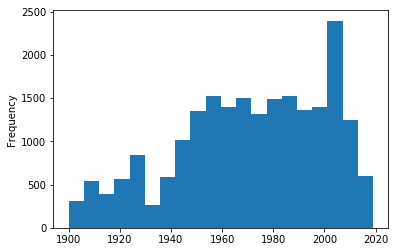

In [14]:
# year built frequency barplot
df['yr_built'].plot.hist(range=(1900, 2019), bins=20)
plt.show()

In [15]:
# make new column for year_built in 3 columns
# 1 between 1900 and 1940
# 2 between 1940 and 1980
# 3 after 1980

df['year_bins'] = df.yr_built.map(lambda x: 1 if x >= 1900 and x <= 1940
                            else (2 if x > 1940 and x <= 1980
                                 else 3))
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_bins
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,3


Text(0, 0.5, 'Longitude')

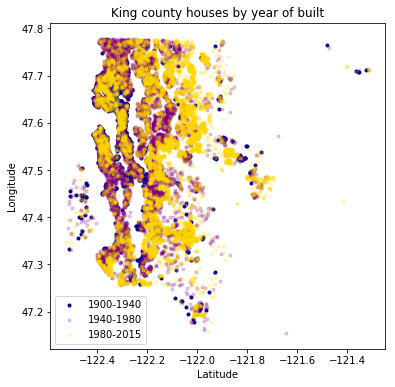

In [16]:
# houses by year of built

lat1 = df.loc[df['year_bins'] == 1].lat
long1 = df.loc[df['year_bins'] == 1].long

lat2 = df.loc[df['year_bins'] == 2].lat
long2 = df.loc[df['year_bins'] == 2].long

lat3 = df.loc[df['year_bins'] == 3].lat
long3 = df.loc[df['year_bins'] == 3].long

all_houses = plt.figure(figsize=(6,6))

plt.scatter(long1, lat1, label = '1900-1940', color='darkblue', marker='.')
plt.scatter(long2, lat2, label = '1940-1980', color='purple', marker='.', alpha=0.2)
plt.scatter(long3, lat3, label = '1980-2015', color='gold', marker='.', alpha=0.2)

plt.title('King county houses by year of built')
plt.legend()

plt.xlabel('Latitude')
plt.ylabel('Longitude')

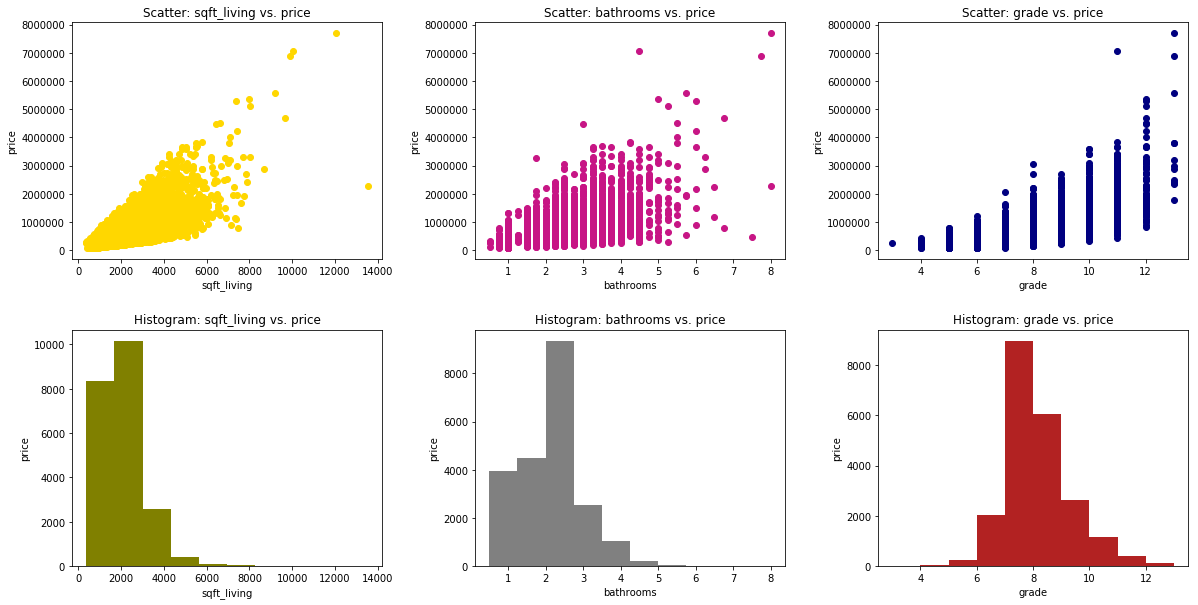

In [17]:
fig = plt.figure(figsize=(20,10))


# Sqft_living - scatter
# ---------------------

ax1 = fig.add_subplot(231)
x = df.sqft_living
y = df.price
ax1.scatter(x,y, color='gold')
ax1.set_title('Scatter: sqft_living vs. price')
ax1.set_xlabel('sqft_living')
ax1.set_ylabel('price')



# Bathrooms - scatter
# -------------------

ax2 = fig.add_subplot(232)
x = df.bathrooms
y = df.price
ax2.scatter(x,y,color='mediumvioletred')
ax2.set_title('Scatter: bathrooms vs. price')
ax2.set_xlabel('bathrooms')
ax2.set_ylabel('price')


# Grade - scatter
# ---------------

ax3 = fig.add_subplot(233)
x = df.grade
y = df.price
ax3.scatter(x,y,color='navy')
ax3.set_title('Scatter: grade vs. price')
ax3.set_xlabel('grade')
ax3.set_ylabel('price')


# Sqft_living - histogram
# -----------------------

ax4 = fig.add_subplot(234)
x = df.sqft_living
y = df.price
ax4.hist(x, color='olive')
ax4.set_title('Histogram: sqft_living vs. price')
ax4.set_xlabel('sqft_living')
ax4.set_ylabel('price')


# Bathrooms - histogram
# ---------------------

ax5 = fig.add_subplot(235)
x = df.bathrooms
y = df.price
ax5.hist(x,color='grey')
ax5.set_title('Histogram: bathrooms vs. price')
ax5.set_xlabel('bathrooms')
ax5.set_ylabel('price')


# Grade - histogram
# -----------------

ax6 = fig.add_subplot(236)
x = df.grade
y = df.price
ax6.hist(x,color='firebrick')
ax6.set_title('Histogram: grade vs. price')
ax6.set_xlabel('grade')
ax6.set_ylabel('price')


# Plot all charts...
# ------------------

plt.subplots_adjust(wspace=0.3,hspace=0.3)
plt.show()

# Look at house sales by date


Text(0, 0.5, 'Latidude')

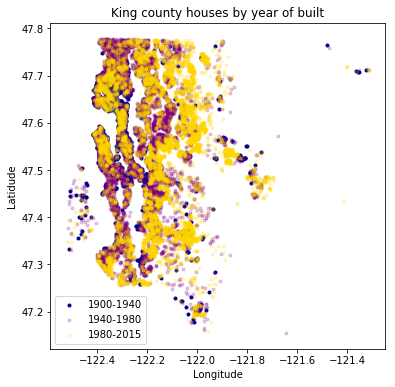

In [21]:
# houses by year of built

lat1 = df.loc[df['year_bins'] == 1].lat
long1 = df.loc[df['year_bins'] == 1].long

lat2 = df.loc[df['year_bins'] == 2].lat
long2 = df.loc[df['year_bins'] == 2].long

lat3 = df.loc[df['year_bins'] == 3].lat
long3 = df.loc[df['year_bins'] == 3].long

all_houses = plt.figure(figsize=(6,6))

plt.scatter(long1, lat1, label = '1900-1940', color='darkblue', marker='.')
plt.scatter(long2, lat2, label = '1940-1980', color='purple', marker='.', alpha=0.2)
plt.scatter(long3, lat3, label = '1980-2015', color='gold', marker='.', alpha=0.2)

plt.title('King county houses by year of built')
plt.legend()

plt.xlabel('Longitude')
plt.ylabel('Latidude')

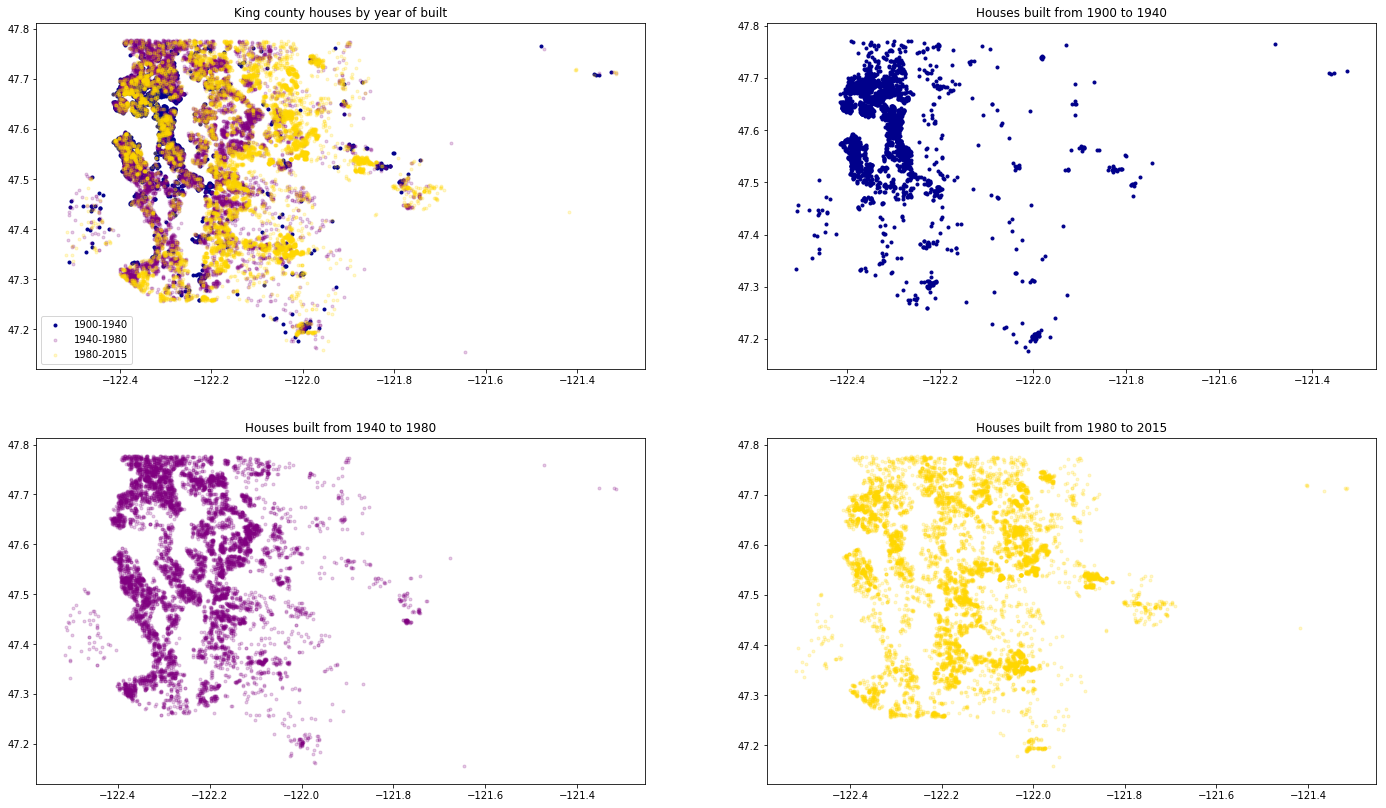

In [19]:
fig = plt.figure(figsize = (24,14))

ax1 = fig.add_subplot(221)
# lat1 = df.loc[df['year_bins'] == 1].lat
# long1 = df.loc[df['year_bins'] == 1].long

# lat2 = df.loc[df['year_bins'] == 2].lat
# long2 = df.loc[df['year_bins'] == 2].long

# lat3 = df.loc[df['year_bins'] == 3].lat
# long3 = df.loc[df['year_bins'] == 3].long

# all_houses = plt.figure(figsize=(6,6))

plt.scatter(long1, lat1, label = '1900-1940', color='darkblue', marker='.')
plt.scatter(long2, lat2, label = '1940-1980', color='purple', marker='.', alpha=0.2)
plt.scatter(long3, lat3, label = '1980-2015', color='gold', marker='.', alpha=0.2)

plt.title('King county houses by year of built')
plt.legend()

# plt.xlabel('Latitude')
# plt.ylabel('Longitude')

ax2 = fig.add_subplot(222)
plt.scatter(long1, lat1, label = '1900-1940', color='darkblue', marker='.')
plt.title('Houses built from 1900 to 1940')

ax3 = fig.add_subplot(223)
plt.scatter(long2, lat2, label = '1940-1980', color='purple', marker='.', alpha=0.2)
plt.title('Houses built from 1940 to 1980')

ax4 = fig.add_subplot(224)
plt.scatter(long3, lat3, label = '1980-2015', color='gold', marker='.', alpha=0.2)
plt.title('Houses built from 1980 to 2015')

plt.show()